<hr color='red'/>

# **Task 1.1, Theory: Bootstrap**

Suppose that we obtain a bootstrap sample from a set of $n$ observations.


1.   👉 Show that on average one-thirds of original observations are not included in each bootstrap sample as $n \rightarrow \infty$. Evaluate this quantity for $n = 10, 20, 50, 100$ and $B = 10, 20, 50, 100$.







1. Consider a sample $X_n$ = $x_1,x_2,\ldots,x_{n}$. So we can "pick" $n$ observations in order to make bootstrap samples. Therefore , we have a chance which is  $\frac{1}{n}$ of including just a single observation. From this it is obvious that then the chance of not including this observation would be $1-\frac{1}{n}$ => for $n$ draws it'll be $1-\frac{1}{n}^n$. 
 
 
$\lim_{n\to\infty}(1-\frac{1}{n})^n $  $\approx$ 0.36. 
 
Thus, the probability of non-inclusion of observation is on average $\approx$ 0.36 which is a little more than $\frac{1}{3}$ of the initial sample 
2. Evaluation for  $n$=10  and  $B$=10 is 0.3486784401000001 
3. Evaluation for  $n$=20  and  $B$=20 is 0.3584859224085419 
4. Evaluation for  $n$=50  and  $B$=50 is 0.36416968008711675 
5. Evaluation for  $n$=100  and  $B$=100 is 0.3660323412732292 
 
 
We see that the values are relatively close to eah other.

<hr color='red'/>

## **Task 2.0: Set Your Seed**

Type your name in the string below to generate a unique seed number for the random number generator used in this assignment.

In [36]:
%reset -f
!pip -q install -U statsmodels plotly > log  # upgrade packages to avoid library warnings
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" 
import pandas as pd, numpy as np, platform, statsmodels.api as sm, plotly, plotly.express as px, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)
pd.set_option('max_rows', 100, 'max_columns', 100, 'max_colwidth', 100, 'precision', 2, 'display.max_rows', 10)
print(f'Python={platform.python_version()},', ', '.join([f"{s}={eval(s+'.__version__')}" for s in 'np pd sm plotly'.split()])) # print package versions

Python=3.7.12, np=1.19.5, pd=1.1.5, sm=0.13.0, plotly=5.3.1


In [37]:
StudentName = "Pavel_Calmanovici"  # For groups: "First_Last,First_Last"
MySeed = int.from_bytes(StudentName.encode(), 'little') % (2**32 - 1)  # this is your unique seed for your homework
print(f'"{StudentName}" results in {MySeed} seed')

"Pavel_Calmanovici, Lanin_Gleb" results in 3095037732 seed


Below we load a dataframe, generate polynomial & interaction terms, subsample rows/columns for each student. The first column is your $Y$ output, which you need to model as a function of the remaining features. Please don't modify this code.

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/omelnikov/data/main/los-angeles-ozone/LAozone.data')

Ycol = np.random.RandomState(MySeed).choice(['ozone', 'temp', 'humidity'])  # we choose Y column
dfX, dfY = df.drop(Ycol, axis=1), df[[Ycol]]  # we remove Y to prevent leakage (function of output among predictors)
poly = PolynomialFeatures(include_bias=False) # generate new features from remaining original features
df = pd.DataFrame(poly.fit_transform(dfX), columns=[s.replace(' ','·') for s in poly.get_feature_names(dfX.columns)])  # package as a dataframe

MyColumns = sorted(np.random.RandomState(MySeed).choice(df.columns, size=np.random.RandomState(MySeed).randint(6,10), replace=False)) # sample feature names
df = pd.concat([dfY, df[MyColumns]], axis=1).sample(frac=.5, random_state=MySeed) # add back Y and sample a fraction of observations
df

,ozone,dpg·doy,humidity·vis,temp^2,vh·humidity,vis·doy,wind·doy
32,3,666.0,3720.0,900.0,331700.0,2220.0,259.0
24,6,-435.0,2850.0,4096.0,110390.0,4350.0,145.0
182,17,11368.0,6560.0,6561.0,478060.0,15680.0,1176.0
168,26,7421.0,10780.0,7744.0,451220.0,25340.0,724.0
112,19,3720.0,6100.0,4356.0,349530.0,12000.0,600.0
...,...,...,...,...,...,...,...
171,16,9568.0,7680.0,4900.0,372480.0,22080.0,1472.0
221,19,8085.0,4970.0,8649.0,418900.0,17150.0,1225.0
155,14,12600.0,1088.0,6084.0,375040.0,2856.0,504.0
262,24,6111.0,1207.0,4761.0,411090.0,4947.0,1455.0


<hr color='red'/>

## **Task 2.1: Ideas from raw data**

👉Describe 5+ (at least 5) **takeaways** about the small dataframe sample printed above. 
1. 📄 A full sentence or two will suffice. 1-2 words per finding is unlikely to fully describe your finding. Be explicit, concise, and precise.
1. 📄 Do you observe seemingly wrong values (too low or too high), outliers, missing values, any ordered observations, any constant values, any categorical values, any zero values, any values related to $Y$ linearly or nonlinearly, any highly collinear features, too many (or few) observations (or features), any binary variables or categorical variables with few levels, ...?
1. **Why** do this?: see seminar's colab


<h3><font color='red'><b>SOLUTION 2.1:</b></font></h3>

Your solution goes here
1. We have negative values in `dpg·doy`
1. We do not observe any features which can be presented in binary format
1. We have found 36 outliners in total. For some reason ozone has 2 outliners, I don't have any ideas why so.We don't have any outliners in 4th, 5th and 7th columns (`temp^2` , `vh·humidity`, `wind·doy`)
1. There are no missing values.
1. From this dataset we do not observe any seemingly wrong values.



In [39]:
#i would like to avoid AN AttributeError when finding outliners, therefore i will rewrite temp^2 as temp_SQ the same why as i did in HW03 
df = df.rename(columns={'temp^2': 'temp_SQ'})

In [40]:
#Now I'm ready to find outliners if there are any
# here we use prevoius HW solution for finding outliners 
# solution from Lanin Gleb HW3 and HW04
# 1st col
q_diff = df['ozone'].quantile(0.75) - df['ozone'].quantile(0.25) 
q_diff = q_diff * 1.5 
print(df[df.ozone > (df['ozone'].quantile(0.75) + q_diff)].shape[0] + df[df.ozone < (df['ozone'].quantile(0.25) - q_diff)].shape[0], " - Outliners 1st col") 
#2nd col 
q_diff = df['dpg·doy'].quantile(0.75) - df['dpg·doy'].quantile(0.25) 
q_diff = q_diff * 1.5 
print(df[df.dpg·doy > (df['dpg·doy'].quantile(0.75) + q_diff)].shape[0] + df[df.dpg·doy < (df['dpg·doy'].quantile(0.25) - q_diff)].shape[0], " - Outliners 2nd col") 
#3rd col  
q_diff = df['humidity·vis'].quantile(0.75) - df['humidity·vis'].quantile(0.25) 
q_diff = q_diff * 1.5 
print(df[df.humidity·vis > (df['humidity·vis'].quantile(0.75) + q_diff)].shape[0] + df[df.humidity·vis < (df['humidity·vis'].quantile(0.25) - q_diff)].shape[0], " - Outliners 3rd col") 
#4th col  
q_diff = df['temp_SQ'].quantile(0.75) - df['temp_SQ'].quantile(0.25) 
q_diff = q_diff * 1.5 
print(df[df.temp_SQ > (df['temp_SQ'].quantile(0.75) + q_diff)].shape[0] + df[df.temp_SQ < (df['temp_SQ'].quantile(0.25) - q_diff)].shape[0], " - Outliners 4th col") 
#5th col  
q_diff = df['vh·humidity'].quantile(0.75) - df['vh·humidity'].quantile(0.25) 
q_diff = q_diff * 1.5 
print(df[df.vh·humidity > (df['vh·humidity'].quantile(0.75) + q_diff)].shape[0] + df[df.vh·humidity < (df['vh·humidity'].quantile(0.25) - q_diff)].shape[0], " - Outliners 5th col") 
#6th col  
q_diff = df['vis·doy'].quantile(0.75) - df['vis·doy'].quantile(0.25) 
q_diff = q_diff * 1.5 
print(df[df.vis·doy > (df['vis·doy'].quantile(0.75) + q_diff)].shape[0] + df[df.vis·doy < (df['vis·doy'].quantile(0.25) - q_diff)].shape[0], " - Outliners 6th col")
#7th col  
q_diff = df['wind·doy'].quantile(0.75) - df['wind·doy'].quantile(0.25) 
q_diff = q_diff * 1.5 
print(df[df.wind·doy > (df['wind·doy'].quantile(0.75) + q_diff)].shape[0] + df[df.wind·doy < (df['wind·doy'].quantile(0.25) - q_diff)].shape[0], " - Outliners 7th col")

2  - Outliners 1st col
6  - Outliners 2nd col
10  - Outliners 3rd col
0  - Outliners 4th col
0  - Outliners 5th col
18  - Outliners 6th col
0  - Outliners 7th col


<hr color='red'/>

## **Task 2.2: Ideas from data structure**

👉Use dataframe's `info()` method to create the structure of the features. 
 
1. 👉Describe 1+ **takeaway**.
  * 📄 Any missing values (just a few or a lot), any unusual data types (int where float is expected, etc.), any object (i.e. string) datatypes - do these make sense to you why or why not? You will need to read about these features to conclude whether data types make sense.
  * **Why** do this?: see seminar's colab
1. 👉Do any data types need to be converted to a different data type? Why? 
  1. 📄 Any metric variables with integer or string values? Or any ordinal variables with floating or string values? Why do you think these are metric or ordinal or categorical, etc.?


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 32 to 162
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ozone         165 non-null    int64  
 1   dpg·doy       165 non-null    float64
 2   humidity·vis  165 non-null    float64
 3   temp_SQ       165 non-null    float64
 4   vh·humidity   165 non-null    float64
 5   vis·doy       165 non-null    float64
 6   wind·doy      165 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 10.3 KB


In [42]:
np.round(df.corr(), 2) 

,ozone,dpg·doy,humidity·vis,temp_SQ,vh·humidity,vis·doy,wind·doy
ozone,1.00,0.41,-0.16,0.83,0.54,-0.25,0.31
dpg·doy,0.41,1.00,0.25,0.40,0.65,-0.36,0.21
humidity·vis,-0.16,0.25,1.00,-0.21,0.26,0.21,-0.03
temp_SQ,0.83,0.40,-0.21,1.00,0.41,-0.11,0.37
vh·humidity,0.54,0.65,0.26,0.41,1.00,-0.31,0.31
vis·doy,-0.25,-0.36,0.21,-0.11,-0.31,1.00,0.34
wind·doy,0.31,0.21,-0.03,0.37,0.31,0.34,1.00


<h3><font color='red'><b>SOLUTION 2.2:</b></font></h3>

Your solution goes here

1. As it was already mentioned, there are no missing features, all nides are non-null, all the dataset is complete.
1. Since we do not have variables which can be presented in another type , we may not convert them.
1. We have quite weak correlation on the whole dataset. The only strong correlation is between `vh·humidity` and `dpg·doy` wich equals 0.65 . And between `temp_SQ` and `ozone` and it equals 0.83.

<hr color='red'/>

## **Task 2.3: Bootstrap samples analysis**

👉 Create 5 bootstrap samples and analyse how they differ statistically from the original dataset. Use dataframe's `describe()` method for that. Pay attention to the `mean` and `std`. Set seeds from 0 to 4 respectively.

<h3><font color='red'><b>SOLUTION 2.3:</b></font></h3>

Your analysis goes here
1. `dpg·doy` seems to have a wide range of values. It's greatest value in this  dataframe is 102, 15436 the smallest is -23184. 
1. In each Bootstrap sample the `mean` is different from the initial data sample.
1. Each Bootstrap sample has a different number of rows ranging from 15 to 99.Two samples have an equal number of rows equal to 61, the initial data set consisted of 165 rows so the range of samples can be quite big.
1. The `std` increases with the nuber of rows in the Bootstrap sample.
1. In the Bootstarping sample 2, we don't have zero value.

In [43]:
df.describe()

,ozone,dpg·doy,humidity·vis,temp_SQ,vh·humidity,vis·doy,wind·doy
count,165.00,165.00,165.00,165.00,165.00,165.00,165.00
mean,11.61,2292.78,6607.10,4124.15,323499.33,21178.61,822.15
std,7.96,6901.03,4462.69,1863.75,123404.72,20020.50,567.79
min,2.00,-23184.00,106.00,900.00,107350.00,150.00,0.00
25%,5.00,-680.00,3350.00,2704.00,234360.00,9750.00,340.00
50%,9.00,3024.00,6210.00,3969.00,359730.00,16310.00,714.00
75%,16.00,7584.00,8120.00,5184.00,421060.00,24640.00,1272.00
max,34.00,15436.00,25200.00,8649.00,531760.00,107100.00,2170.00


In [44]:
import random 
random.seed(0)
boot_sample0 = df.sample(n=random.randint(1, 165), replace=True, random_state=0)
random.seed(1)
boot_sample1 = df.sample(n=random.randint(1, 165), replace=True, random_state=0)
random.seed(2)
boot_sample2 = df.sample(n=random.randint(1, 165), replace=True, random_state=0)
random.seed(3)
boot_sample3 = df.sample(n=random.randint(1, 165), replace=True, random_state=0)
random.seed(4)
boot_sample4 = df.sample(n=random.randint(1, 165), replace=True, random_state=0)

In [45]:
boot_sample0.describe()

,ozone,dpg·doy,humidity·vis,temp_SQ,vh·humidity,vis·doy,wind·doy
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,12.10,2657.76,6852.26,4251.69,346092.42,22153.43,816.91
std,7.49,6647.28,4304.25,1833.34,117008.32,19561.72,556.23
min,2.00,-17316.00,152.00,900.00,107350.00,520.00,0.00
25%,6.00,-795.00,3040.00,2916.00,279760.00,9795.00,411.00
50%,10.00,3848.00,6500.00,4096.00,380160.00,16800.00,714.00
75%,16.50,7695.00,8990.00,5476.00,433565.00,25380.00,1296.50
max,30.00,12931.00,21600.00,8649.00,531760.00,102900.00,2058.00


In [46]:
boot_sample1.describe()

,ozone,dpg·doy,humidity·vis,temp_SQ,vh·humidity,vis·doy,wind·doy
count,35.00,35.00,35.00,35.00,35.00,35.00,35.00
mean,9.97,690.94,6812.29,3709.89,317625.14,26119.71,801.80
std,6.87,8043.63,4655.78,1804.41,129959.69,18898.24,592.33
min,3.00,-17316.00,1320.00,961.00,107350.00,520.00,0.00
25%,5.00,-3069.00,2655.00,2352.50,212220.00,9795.00,334.00
50%,9.00,1008.00,6500.00,3481.00,371150.00,20100.00,706.00
75%,12.50,5720.50,9575.00,4422.50,416390.00,43725.00,1339.50
max,30.00,12931.00,17200.00,8649.00,518320.00,56800.00,1780.00


In [47]:
boot_sample2.describe()

,ozone,dpg·doy,humidity·vis,temp_SQ,vh·humidity,vis·doy,wind·doy
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,9.67,2984.40,6530.00,3615.07,309848.67,25887.33,1044.00
std,5.89,9032.48,3771.75,1530.83,122789.60,16862.63,550.65
min,3.00,-16608.00,1330.00,961.00,107350.00,6800.00,216.00
25%,6.00,-800.00,3025.00,2658.50,247130.00,13815.00,678.50
50%,9.00,3848.00,6900.00,3136.00,375040.00,20100.00,714.00
75%,11.50,10581.00,9045.00,4498.00,385250.00,35250.00,1535.00
max,25.00,12931.00,13200.00,6724.00,473960.00,55400.00,1780.00


In [48]:
boot_sample3.describe()

,ozone,dpg·doy,humidity·vis,temp_SQ,vh·humidity,vis·doy,wind·doy
count,61.00,61.00,61.00,61.00,61.00,61.00,61.00
mean,12.00,2164.49,6575.07,4165.89,327662.30,21267.33,800.92
std,7.48,6862.80,4142.76,1874.05,122158.11,16484.06,565.55
min,3.00,-17316.00,152.00,961.00,107350.00,520.00,0.00
25%,6.00,-738.00,2850.00,2809.00,234360.00,9780.00,340.00
50%,10.00,3601.00,6400.00,4096.00,366660.00,17100.00,706.00
75%,16.00,6588.00,8850.00,5329.00,424020.00,25560.00,1272.00
max,30.00,12931.00,17200.00,8649.00,518320.00,56800.00,1952.00


In [49]:
boot_sample4.describe()

,ozone,dpg·doy,humidity·vis,temp_SQ,vh·humidity,vis·doy,wind·doy
count,61.00,61.00,61.00,61.00,61.00,61.00,61.00
mean,12.00,2164.49,6575.07,4165.89,327662.30,21267.33,800.92
std,7.48,6862.80,4142.76,1874.05,122158.11,16484.06,565.55
min,3.00,-17316.00,152.00,961.00,107350.00,520.00,0.00
25%,6.00,-738.00,2850.00,2809.00,234360.00,9780.00,340.00
50%,10.00,3601.00,6400.00,4096.00,366660.00,17100.00,706.00
75%,16.00,6588.00,8850.00,5329.00,424020.00,25560.00,1272.00
max,30.00,12931.00,17200.00,8649.00,518320.00,56800.00,1952.00


<hr color='red'/>

## **Task 2.4: Ideas from relations**

1. 👉Create heatmaps for each bootstrap samples
1. 👉Describe **3 takeaway** about correlation
  * 📄 Always focus on the relation between inputs and $Y$. Always start with correlation (linear relation) because it is measurable.
1. Is there any features that have bigger/smaller coefficients in one sample but do not have in another?

<h3><font color='red'><b>SOLUTION 2.4:</b></font></h3>

Your analysis goes here
1. The highest correlation in each sample is between temp and ozone and they are strongly correlated as the value is bigger than 0.5.
1. In the second sample heat map the correlation between vis·doy and dpg·doy is negative, but the sme correlation is positive in other samples.
1. All the heatmaps look similar exept for the heatmap of the second bootstrap sample, which has the least amount of observations in it.

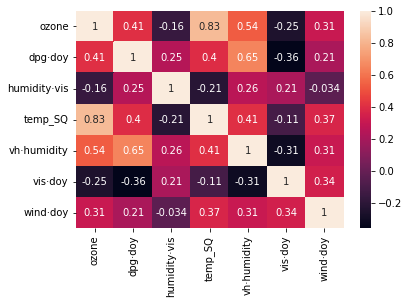

In [50]:
sns.heatmap(df.corr(), annot = True, fmt='.2g')

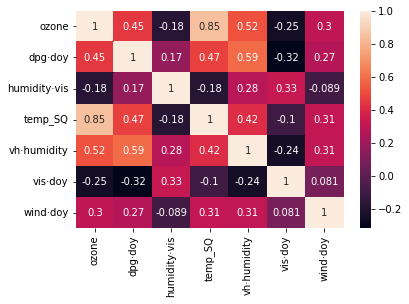

In [51]:
sns.heatmap(boot_sample0.corr(), annot = True, fmt='.2g')


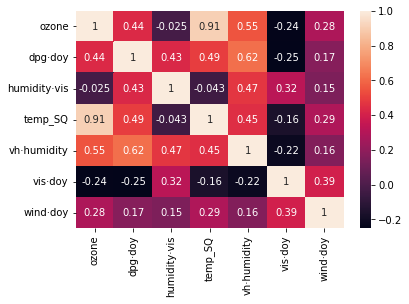

In [52]:
sns.heatmap(boot_sample1.corr(), annot = True, fmt='.2g')

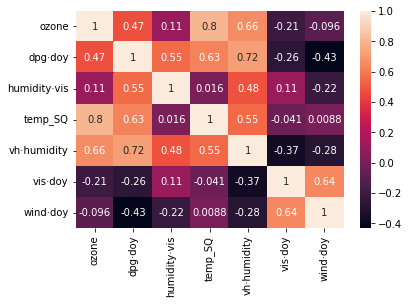

In [53]:
sns.heatmap(boot_sample2.corr(), annot = True, fmt='.2g')

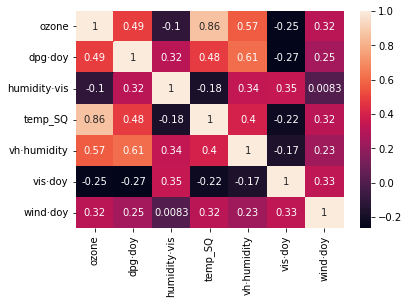

In [54]:
sns.heatmap(boot_sample3.corr(), annot = True, fmt='.2g')

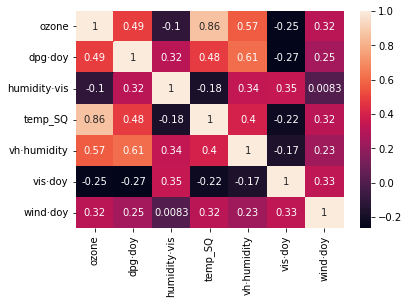

In [55]:
sns.heatmap(boot_sample4.corr(), annot = True, fmt='.2g')

<hr color='red'/>

## **Task 2.5: CV**

1. 👉Split data based on [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit) (the training sets are always in the past and the validation sets are always in the future, so that you are never training on the future to predict the past) into 5 splits.

1. 👉Explain why you don't need to specify random_state here.

1. 👉Explain why it is better to use TimeSeriesSplit with this data

<h3><font color='red'><b>SOLUTION 2.5:</b></font></h3>

Your analysis goes here
1. Implented in code below
1. TimeSeriesSplit splits arrays into random train and test subsets. In other CV methods when we run them without specifying random_state we get a different result, but in TimeSeriesSplit successive training sets are supersets of those that come before them so we don't need to specify random_state here.
1. In our data we don't have the date parameter we can't sort it by date so by using TimeSeriesSplit we can obtain the same results every time on this data set.


In [56]:
df = df.drop("wind·doy", axis=1)
df = df.drop("vh·humidity", axis=1)
df

,ozone,dpg·doy,humidity·vis,temp_SQ,vis·doy
32,3,666.0,3720.0,900.0,2220.0
24,6,-435.0,2850.0,4096.0,4350.0
182,17,11368.0,6560.0,6561.0,15680.0
168,26,7421.0,10780.0,7744.0,25340.0
112,19,3720.0,6100.0,4356.0,12000.0
...,...,...,...,...,...
171,16,9568.0,7680.0,4900.0,22080.0
221,19,8085.0,4970.0,8649.0,17150.0
155,14,12600.0,1088.0,6084.0,2856.0
262,24,6111.0,1207.0,4761.0,4947.0


In [57]:
cv_splits_train = []
cv_splits_test = []

In [58]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array(df[['dpg·doy', 'humidity·vis', 'temp_SQ', 'vis·doy']])
Y = np.array(df['ozone'])
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  cv_splits_train.append([X_train, y_train])
  cv_splits_test.append([X_test, y_test])

<hr color='red'/>

## **Task 2.6: Baseline Model**

Let's build the baseline model, version 0
1. 👉Use `train_test_split` to (seed and) split your sample into 80% training set. 
1. 👉Use `sklearn` linear regression to build a simple model
1. 👉Use `root_mean_squared_error` to establish the quality of your model. Analyse the results.
1. 👉Explain why it's not a good idea to use basic `train_test_split`

<h3><font color='red'><b>SOLUTION 2.6:</b></font></h3>

Your analysis goes here
1.train_test_split splits the data randomly the data is not seeded. On each splitting we will get a different set of data, so the prdiction will change every time.


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print(regressor.intercept_)

-2.116091140356067


In [61]:
print(regressor.coef_)

[-0.      0.0001  0.0034 -0.0001]


In [62]:
pred = regressor.predict(X_test)

In [63]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
0,6,8.30
1,3,6.38
2,3,2.98
3,12,11.04
4,8,12.47
...,...,...
28,5,5.69
29,18,12.05
30,34,23.32
31,4,8.05


In [66]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, pred)) #Mean Absolute Error
print(mean_squared_error(y_test, pred, squared=False)) #Mean Squared Error

3.909769195600099
5.291623747395691


<hr color='red'/>

## **Task 2.7: CV**

👉 Score you model on CV-folds you've created earlier. Did the metric change? How? Why? 

👉 What results are more fair? 

*Hint: Think about the distribution we are estimating with each cross validation.*

In [67]:
# SOLUTION
metrics = []

for i in range(5):
  tX = cv_splits_train[i][0]
  tY = cv_splits_train[i][1]
  vX = cv_splits_test[i][0]
  vY = cv_splits_test[i][1]
  linreg = LinearRegression().fit(tX, tY)
  pred = linreg.predict(vX)
  metrics.append(mean_squared_error(vY, pred, squared=False))

print(np.mean(metrics))

4.682694741602016


<h3><font color='red'><b>SOLUTION 2.7:</b></font></h3>

Your analysis goes here
1. The metric changed, in our base realisation the MSE was 5.291623747395691 and the score on CV-folds is better 4.682694741602016, the result is better becuse the data is not splitted in 5 parts.
1. The results from the first realisation are more fair, we split the data and get the MSE from 5 samples.